# Исследование популярного сервиса аренды самокатов GoFast

Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки
- абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

**Цель исследования:** 

- понять, тратят ли пользователи с подпиской больше времени на поездки? 
- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- понять будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**Ход исследования:**  

- Загрузить данные
- Провести предобработку данных
- Провести исследовательский анализ данных
- Объединение данных
- Подсчёт выручки
- Проверка гипотез

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

### Шаг 1. Загрузка данных

#### 1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. 

In [2]:
try:
    users_go_df = pd.read_csv('/datasets/users_go.csv',sep=',')
    rides_go_df = pd.read_csv('/datasets/rides_go.csv',sep=',')
    subscriptions_go_df = pd.read_csv('/datasets/subscriptions_go.csv',sep=',')
except:
    users_go_df = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project3_scooter_goFast/datasets/users_go.csv',sep=',')
    rides_go_df = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project3_scooter_goFast/datasets/rides_go.csv',sep=',')
    subscriptions_go_df = pd.read_csv('/Users/a0000/Documents/Analitic/All_projects/project3_scooter_goFast/datasets/subscriptions_go.csv',sep=',')
    

#### 1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

**Столбец Пользователи**

In [3]:
users_go_df.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**Столбец Поездки**

In [5]:
rides_go_df.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**Столбец Подписки**

In [7]:
subscriptions_go_df

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


**Промежуточный вывод** : Пропусков в стобцах не обнаружено, в таблице "Поездки" значения столбцов `distance`	и `duration` стоит округлить.

### Шаг 2. Предобработка данных

#### 2.1 Приведем столбец date к типу даты pandas.

In [9]:
rides_go_df['date'] = pd.to_datetime(rides_go_df['date'])

#### 2.2 Создаим новый столбец с номером месяца на основе столбца date.

In [10]:
rides_go_df['date'].min()

Timestamp('2021-01-01 00:00:00')

In [11]:
rides_go_df['date'].max()

Timestamp('2021-12-30 00:00:00')

Так как у нас данные только за 2021 год, тогда дополнительные проверки для получения месяца, можно исключить

In [12]:
rides_go_df['month'] = rides_go_df['date'].dt.month

#### 2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [13]:
users_go_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
rides_go_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [15]:
subscriptions_go_df.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Мы проверили наличие пропущенных значений и убедились что в наших таблицах отсутствуют пропуски.

In [16]:
print(f'Количество дубликатов в таблице users_go_df: {users_go_df.duplicated().sum()}')
print(f'Количество дубликатов в таблице rides_go_df: {rides_go_df.duplicated().sum()}')


Количество дубликатов в таблице users_go_df: 31
Количество дубликатов в таблице rides_go_df: 0


In [17]:
users_go_df = users_go_df.drop_duplicates().reset_index(drop=True)

Мы проверили наличие дубликатов в таблицах, после исключили дубликаты из таблицы `users_go_df`.

#### 2.4 Добавим столбец дистанции в км

In [18]:
rides_go_df['distance_km'] = (rides_go_df['distance'] / 1000).round(3)

In [19]:
rides_go_df.head(5)

,user_id,distance,duration,date,month,distance_km
0,1,4409.919140,25.599769,2021-01-01,1,4.410
1,1,2617.592153,15.816871,2021-01-18,1,2.618
2,1,754.159807,6.232113,2021-04-20,4,0.754
3,1,2694.783254,18.511000,2021-08-11,8,2.695
4,1,4028.687306,26.265803,2021-08-28,8,4.029


**Промежуточный вывод:** Изначально нам дано расстояние в метрах, чтобы было удобнее рабоать с данными и исключить на графике большие значения для большей наглядности, я добавлю столбец с расстоянием в км, с тремя знаками после запятой.

### Шаг 3. Исследовательский анализ данных

#### 3.1 Частота встречаемости городов;

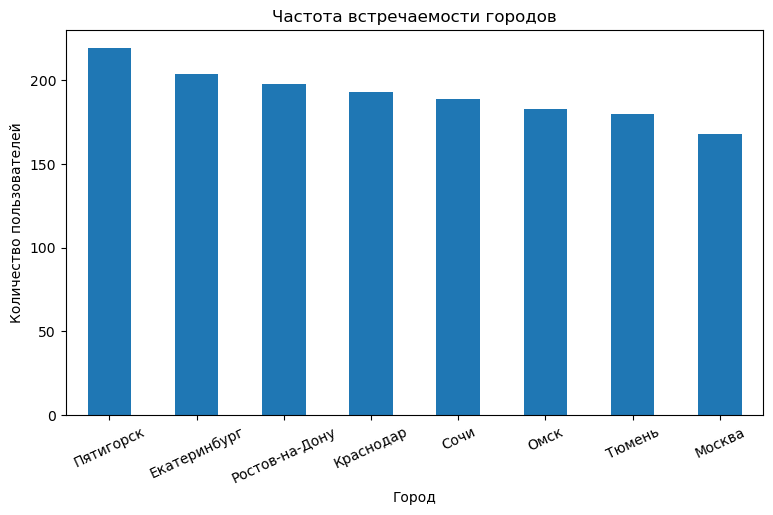

In [20]:
city_counts = users_go_df['city'].value_counts().sort_values(ascending=False)
city_counts.plot(kind='bar', figsize=(9, 5))
plt.xticks(rotation=25)
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title('Частота встречаемости городов')
plt.show()

**Промежуточный вывод:** Самый Часто встречаемый город - это Пятигорск, самый менее встречаемый Москва, есть предположение, что это связано с тем, что Москва крупный город и в нем больше конкуренции, чем в Пятигорске и остальных городах

#### 3.2 Соотношение пользователей с подпиской и без подписки;

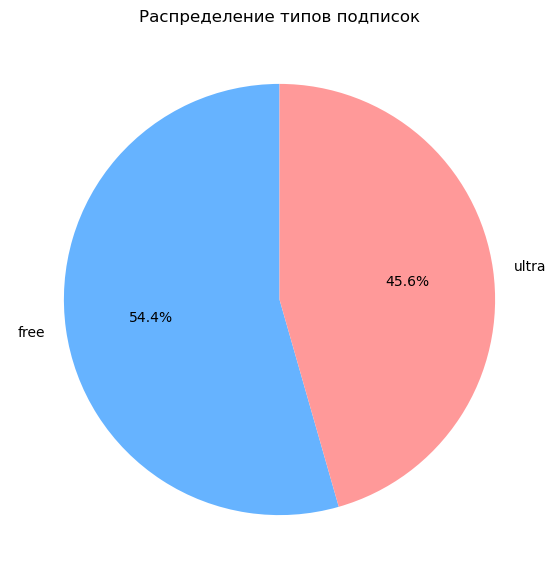

In [21]:
subscription_counts = users_go_df['subscription_type'].value_counts()

plt.figure(figsize=(7, 7))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Распределение типов подписок')
plt.ylabel('') 
plt.show()

**Промежуточный вывод:** Пользователей без подписки 54,4% , а с подпиской 45,6% 

#### 3.3 Возраст пользователей;

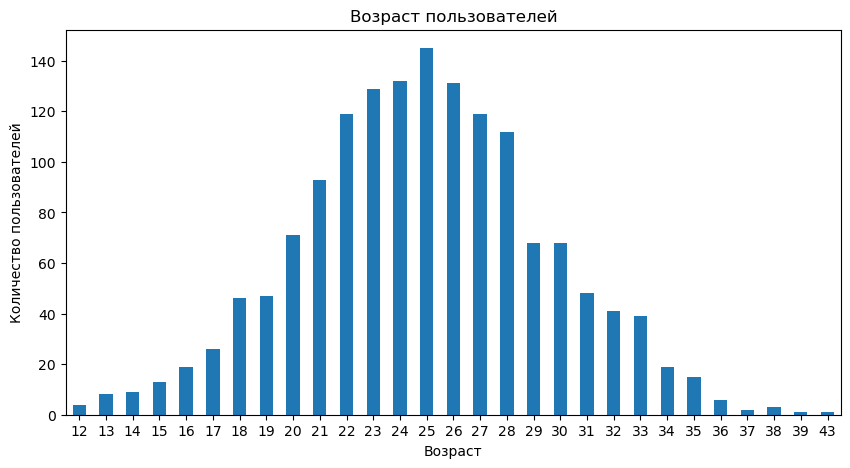

In [22]:
age_counts = users_go_df['age'].value_counts()

age_counts_sorted = age_counts.sort_index()

age_counts_sorted.plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=0)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Возраст пользователей')
plt.show()

**Промежуточный вывод:** По графику мы можем заметить, что основной пик пользователей расположен при возрасте в 25 лет, подгрупа с преимущетсвенным количеством пользоватлей при возрасте от 22 до 28 лет, это молодые платежеспособные клиенты, пользователи младше 22 лет меньше пользуются сервисом аренды самоката возможно из-за недостатка свободных средств, так как эти люди менее платежеспособны из-за учебы в школах/университетах, пользователи страше 28 лет так же меньше пользуются сервисом аренды самоката возможно из-за того, что с возрастом им это менее интересно или уже финансово состоялись и передвигаются на личных автомобилях или такси.

#### 3.4  Расстояние, которое пользователь преодолел за одну поездку;

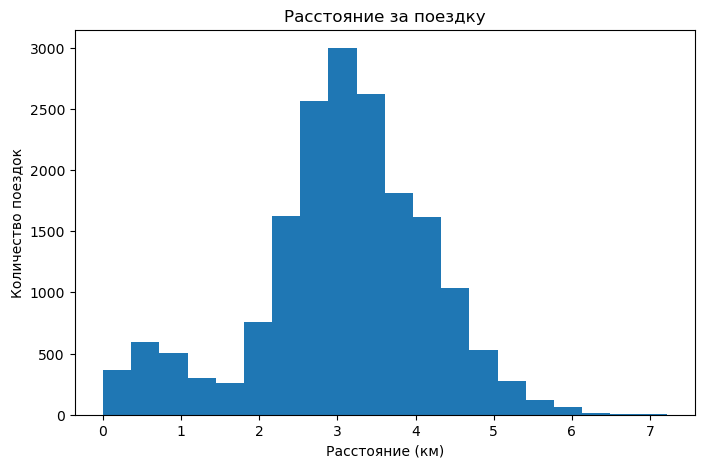

In [23]:
city_counts = rides_go_df['distance_km']
city_counts.plot(kind='hist', figsize=(8, 5),bins = 20)
plt.xticks(rotation=0)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.title('Расстояние за поездку')
plt.show()

**Промежуточный вывод:** Основной пик распределения расстояния пользователей за одну поездку, находится в диапозоне от 3 до 3,5 км. , далее с увеличением расстояния количество поездок уменьшается.

#### 3.5 Продолжительность поездок.

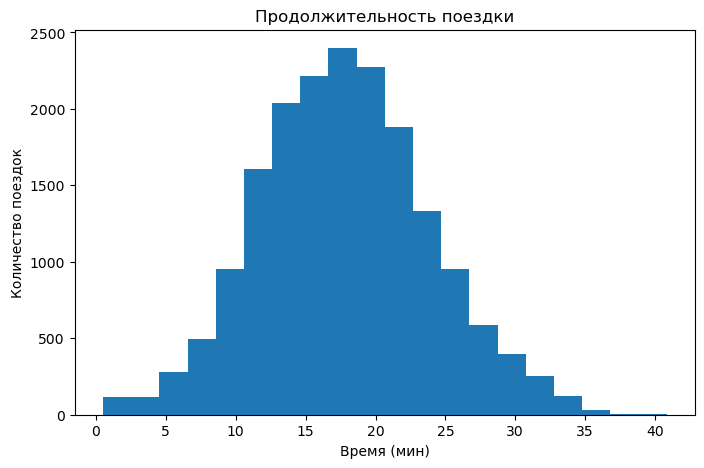

In [24]:
time_counts = rides_go_df['duration']
time_counts.plot(kind='hist', figsize=(8, 5),bins = 20)
plt.xticks(rotation=0)
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездки')
plt.show()

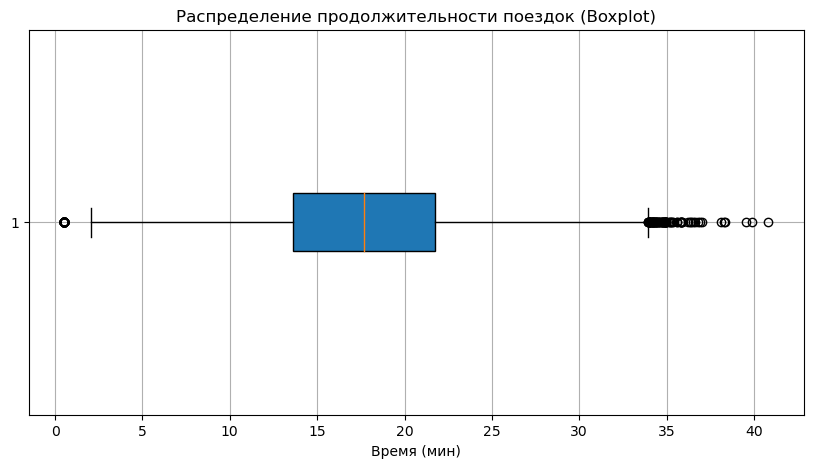

In [25]:
plt.figure(figsize=(10, 5))
plt.boxplot(time_counts, vert=False, patch_artist=True)  # vert=False для горизонтального боксплота
plt.title('Распределение продолжительности поездок (Boxplot)')
plt.xlabel('Время (мин)')
plt.grid(True)
plt.show()

**Промежуточный вывод:** Основной пик распределения расстояния продолжительности поездок, находится в диапозоне от 15 до 23 минут, далее с увеличением времени количество поездок уменьшается.

### Шаг 4. Объединение данных

#### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [26]:
data_one_two = pd.merge(users_go_df,rides_go_df, on = 'user_id', how = 'inner')
data = pd.merge(data_one_two,subscriptions_go_df, on = 'subscription_type', how = 'inner')

In [27]:
data.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_km,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,4.410,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2.618,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,0.754,6,0,199


In [28]:
users_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.1+ KB


In [29]:
rides_go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      18068 non-null  int64         
 1   distance     18068 non-null  float64       
 2   duration     18068 non-null  float64       
 3   date         18068 non-null  datetime64[ns]
 4   month        18068 non-null  int32         
 5   distance_km  18068 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 776.5 KB


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   distance_km        18068 non-null  float64       
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(

До обьединения размер `users_go_df` = 1534 и `rides_go_df` = 18068 , `data` = 18068 , размеры сходятся, значит все было сделано верно

#### 4.2 Создим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- с данными о пользователях без подписки; 
- с данными о пользователях с подпиской.

In [31]:
data_free = data.query("subscription_type == 'free' ").reset_index(drop=True)

In [32]:
data_free.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_km,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2.516,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,0.847,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,4.004,8,50,0


In [33]:
data_ultra = data.query("subscription_type == 'ultra' ").reset_index(drop=True)

In [34]:
data_ultra.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_km,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,4.410,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2.618,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,0.754,6,0,199


#### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

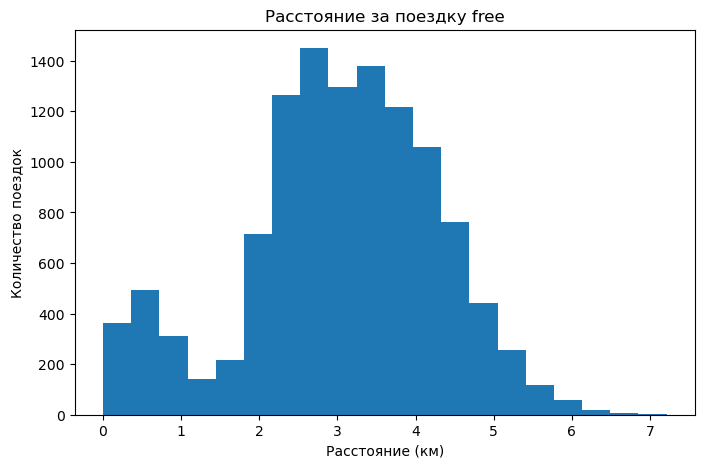

In [35]:
city_counts = data_free['distance_km']
city_counts.plot(kind='hist', figsize=(8, 5),bins = 20)
plt.xticks(rotation=0)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.title('Расстояние за поездку free')
plt.show()

**Промежуточный вывод:** Большинство значений расстояния за одну поездку расположено от 2,4 до 3,8 км 

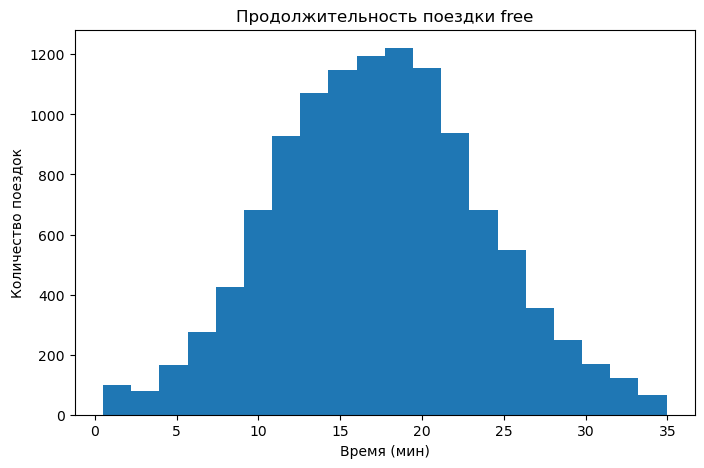

In [36]:
city_counts = data_free['duration']
city_counts.plot(kind='hist', figsize=(8, 5),bins = 20)
plt.xticks(rotation=0)
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездки free')
plt.show()

**Промежуточный вывод:** Большинство значений продолжительности времени за одну поездку расположено от 15 до 23 мин. 

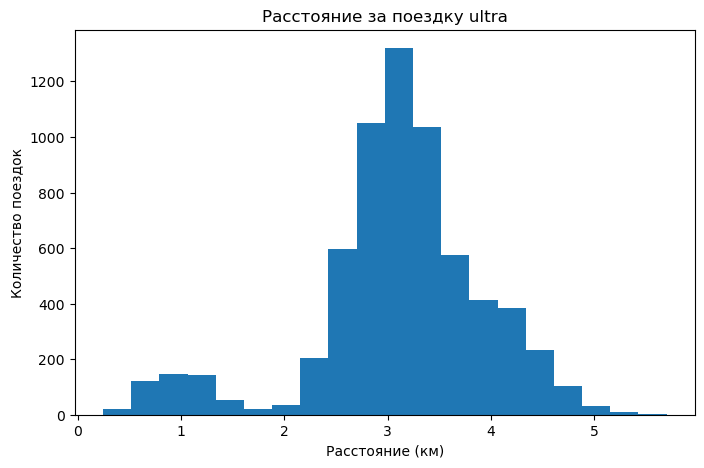

In [37]:
city_counts = data_ultra['distance_km']
city_counts.plot(kind='hist', figsize=(8, 5),bins = 20)
plt.xticks(rotation=0)
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.title('Расстояние за поездку ultra')
plt.show()

**Промежуточный вывод:** Большинство значений расстояния за одну поездку расположено от 2,7 до 3,5 км, основной пик при 3 км. 

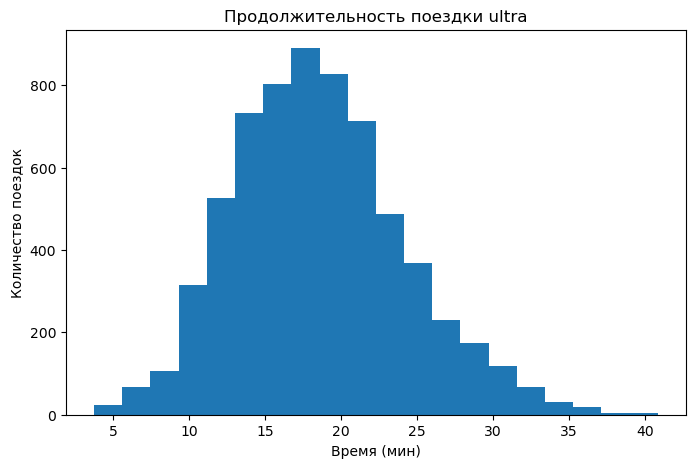

In [38]:
city_counts = data_ultra['duration']
city_counts.plot(kind='hist', figsize=(8, 5),bins = 20)
plt.xticks(rotation=0)
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездки ultra')
plt.show()

**Промежуточный вывод:** Большинство значений продолжительности времени за одну поездку расположено от 15 до 22 мин. Основной пик при 17 мин. 

### Шаг 5. Подсчёт выручки

Проверим пропуски в сводных таблицах

In [39]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
distance_km          0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Промежуточный вывод:** Пропуски в данных отсутсвуют.

#### 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: 
- найдите суммарное расстояние, 
- количество поездок и суммарное время для каждого пользователя за каждый месяц.


**Без подписки**

In [40]:
aggregate_data_free = data_free.groupby(['user_id', 'month']).agg(
    total_distance=('distance_km', 'sum'),  # Суммарное расстояние в километрах
    number_of_rides=('distance_km', 'count'),  # Количество поездок
    total_duration=('duration', 'sum')  # Суммарное время в минутах
).reset_index()
aggregate_data_free['total_duration'] = np.ceil(aggregate_data_free['total_duration']).astype(int)
aggregate_data_free.head(10)

,user_id,month,total_distance,number_of_rides,total_duration
0,700,1,2.516,1,15
1,700,2,13.446,5,86
2,700,3,3.798,1,19
3,700,4,2.985,1,16
4,700,6,5.928,2,29
5,700,7,4.399,2,21
6,700,8,4.072,1,17
7,700,10,6.322,2,43
8,700,11,8.736,3,32
9,701,1,2.676,1,18


In [41]:
aggregate_data_free.isna().sum()

user_id            0
month              0
total_distance     0
number_of_rides    0
total_duration     0
dtype: int64

**С подпиской**

In [42]:
aggregate_data_ultra = data_ultra.groupby(['user_id', 'month']).agg(
    total_distance=('distance_km', 'sum'),  # Суммарное расстояние в километрах
    number_of_rides=('distance_km', 'count'),  # Количество поездок
    total_duration=('duration', 'sum')  # Суммарное время в минутах
).reset_index()
aggregate_data_ultra['total_duration'] = np.ceil(aggregate_data_ultra['total_duration']).astype(int)
aggregate_data_ultra.head(10)

,user_id,month,total_distance,number_of_rides,total_duration
0,1,1,7.028,2,42
1,1,4,0.754,1,7
2,1,8,6.724,2,45
3,1,10,5.810,2,32
4,1,11,7.004,3,54
5,1,12,6.752,2,28
6,2,3,10.188,3,61
7,2,4,6.165,2,40
8,2,6,3.255,1,14
9,2,7,6.781,2,47


In [43]:
aggregate_data_ultra.isna().sum()

user_id            0
month              0
total_distance     0
number_of_rides    0
total_duration     0
dtype: int64

#### 5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 25.5 и 26.0

In [44]:
aggregate_data_free['profit'] =(8 * aggregate_data_free['total_duration']) + (aggregate_data_free['number_of_rides'] * 50)

In [45]:
aggregate_data_ultra['profit'] = (6 * aggregate_data_ultra['total_duration']) + data['subscription_fee']

In [46]:
aggregate_data_free.head(3)

,user_id,month,total_distance,number_of_rides,total_duration,profit
0,700,1,2.516,1,15,170
1,700,2,13.446,5,86,938
2,700,3,3.798,1,19,202


In [47]:
aggregate_data_ultra.head(3)

,user_id,month,total_distance,number_of_rides,total_duration,profit
0,1,1,7.028,2,42,451.0
1,1,4,0.754,1,7,241.0
2,1,8,6.724,2,45,469.0


In [48]:
aggregate_data_free

,user_id,month,total_distance,number_of_rides,total_duration,profit
0,700,1,2.516,1,15,170
1,700,2,13.446,5,86,938
2,700,3,3.798,1,19,202
3,700,4,2.985,1,16,178
4,700,6,5.928,2,29,332
...,...,...,...,...,...,...
6793,1534,6,3.409,2,25,300
6794,1534,8,7.623,2,48,484
6795,1534,9,4.928,1,23,234
6796,1534,11,13.349,4,77,816


### Шаг 6. Проверка гипотез

#### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Нулевая гипотеза:** Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки. Это означает, что подписка не влияет на продолжительность поездок.

**Алтернативная гипотеза**: Средняя продолжительность поездок пользователей с подпиской больше, чем средняя продолжительность поездок пользователей без подписки. Это означает, что подписка положительно влияет на продолжительность поездок.

Извлечение данных о продолжительности поездок для каждой группы

In [49]:
ultra_durations = data_ultra['duration']
free_durations = data_free['duration']

In [50]:
alpha = 0.05
results = st.ttest_ind(ultra_durations, free_durations, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Промежуточный вывод:** Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки. Возможно это связно с тем, что люди понимают, что с подпиской использование самокатов будет дешевле для них.

#### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

**Нулевая гипотеза:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метрам или меньше. Это предполагает, что износ самокатов находится в приемлемых пределах.

**Альтернативная гипотеза:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров. Это означает, что расстояния, которые проезжают пользователи, могут привести к повышенному износу самокатов.

In [51]:
ultra_durations = data_ultra['distance']

In [52]:
alpha = 0.05
#results = st.ttest_1samp(ultra_durations, 3130)
results = st.ttest_1samp(ultra_durations, 3130, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


**Промежуточный вывод:** Данные дают достаточное основание не отвергать нулевую гипотезу для выбранного уровня значимости. Значит, можно сделать вывод, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

#### 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

**Нулевая гипотеза**: Средняя помесячная выручка от пользователей с подпиской равна или меньше выручки от пользователей без подписки.


**Альтернативная гипотеза:** Средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [53]:
monthly_revenue_ultra = aggregate_data_ultra['profit']
monthly_revenue_free = aggregate_data_free['profit']

In [54]:
alpha = 0.05
t_statistic, p_value = st.ttest_ind(monthly_revenue_ultra, monthly_revenue_free, equal_var=False, alternative='greater')

# Выводим результаты
print(f't-статистика: {t_statistic}')
print(f'p-value: {p_value}')

# Проверяем p-value
if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

t-статистика: 14.04341703675686
p-value: 1.0718729651261336e-44
Отвергаем нулевую гипотезу


**Промежуточный вывод:** Отвергнуть нулевую гипотезу означает, что существуют статистически значимые доказательства того, что средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Это указывает на то, что пользователи с подпиской приносит компании больше дохода по сравнению с моделью без подписки.

#### 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, можно применить метод scipy.stats.ttest_rel().
Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

Пример формулировки гипотез:

- **Нулевая гипотеза:** Среднее количество обращений в техподдержку до обновления равно среднему количеству обращений после обновления. То есть, обновление не оказало статистически значимого влияния на количество обращений в техподдержку.
- **Альтернативная гипотеза:** Среднее количество обращений в техподдержку после обновления меньше, чем до обновления. Это указывало бы на то, что обновление серверов положительно сказалось на работе приложения.

### Общий вывод

**Анализ данных**

- Исследование распределения городов показало, что Пятигорск является самым часто встречающимся городом среди пользователей, в то время как Москва встречается реже. Это может быть связано с большей конкуренцией в крупных городах.
- Распределение типов подписок показало, что 54.4% пользователей используют сервис без подписки, а 45.6% имеют подписку.
- Возрастные предпочтения указывают на то, что основная аудитория сервиса — молодые люди в возрасте от 22 до 28 лет, что делает их основной целевой группой для маркетинговых кампаний.
- Анализ поездок показал, что большинство поездок приходится на расстояние от 2.4 до 3.8 км и продолжительность от 15 до 23 минут. Это указывает на типичные короткие поездки, которые могут быть связаны с ежедневными поездками на работу или учёбу.

**Объединение данных и дополнительные расчёты**

- Объединение данных о пользователях, поездках и подписках позволило провести комплексный анализ и сгенерировать дополнительные метрики, такие как суммарное расстояние, количество поездок и общее время поездок за месяц для каждого пользователя.
- Расчёт выручки показал, как финансовые показатели различаются между пользователями с подпиской и без. Выручка от пользователей с подпиской оказалась значимо выше, что подтверждает эффективность подписочной модели для увеличения доходов компании.

**Проверка гипотез**

- Гипотеза о времени поездок нашла подтверждения в том, что пользователи с подпиской тратят больше времени на поездки, что было ожидаемым результатом.
- Гипотеза о расстоянии поездок показала, что среднее расстояние, которое проезжают пользователи с подпиской, не превышает оптимальное с точки зрения износа самоката (3130 метров).
- Гипотеза о том, что средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Показывает что пользователи с подпиской приносит компании больше дохода по сравнению с моделью без подписки.

**Рекомендации:**

- Маркетинговые кампании: Сосредоточить маркетинговые усилия на привлечении молодёжи, используя социальные сети, студенческие сообщества и мероприятия. Предложение специальных условий для студентов может увеличить популярность сервиса.
- Расширение в больших городах: Разработать стратегии для привлечения пользователей в больших городах, где конкуренция выше. Это может включать уникальные предложения, сотрудничество с местными бизнесами или организациями.
- Оптимизация продолжительности и расстояний поездок: Продвигать идею коротких поездок как экономичного и экологичного способа передвижения по городу. Разработать тарифы, которые делают короткие поездки более привлекательными.
- Улучшение условий подписки: Анализируя данные, стоит рассмотреть возможность пересмотра условий подписки для увеличения её привлекательности, возможно, введение разных уровней подписки в зависимости от потребностей пользователей.
- Изучение причин недостаточной выгоды от подписок в некоторых месяцах: Провести дополнительный анализ для выявления причин, по которым в некоторые месяцы выручка от подписчиков не превышает выручку от не подписчиков, и разработать стратегии для оптимизации.

Эти шаги помогут не только увеличить популярность и использование сервиса среди целевых аудиторий, но и максимизировать прибыльность компании, поддерживая устойчивое развитие и конкурентоспособность на рынке аренды самокатов.

**Общий вывод**: Анализ показал важность клиентов с подпиской для увеличения доходности компании и выявил ключевые аспекты поведения пользователей, которые могут быть использованы для улучшения сервиса и маркетинговых стратегий.  Результаты анализа показывают эффективность текущей модели подписки и предоставляют основу для дальнейшего развития и оптимизации сервиса.